In [1]:
%load_ext autoreload
%autoreload 2
import miniGPT
import torch
import numpy as np
import json
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

/home/tau/emenier/miniconda3/envs/Fin/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
text, data, vocab_size, tokenizer = miniGPT.data_utils.get_tolkien_data()
data = data.to(device,torch.long)

Model Numbers : 
   Context   : 1024 tokens
   Embedding :  768 tokens
   Layers    :   12
   Heads     :   12
   Params    : 102 M


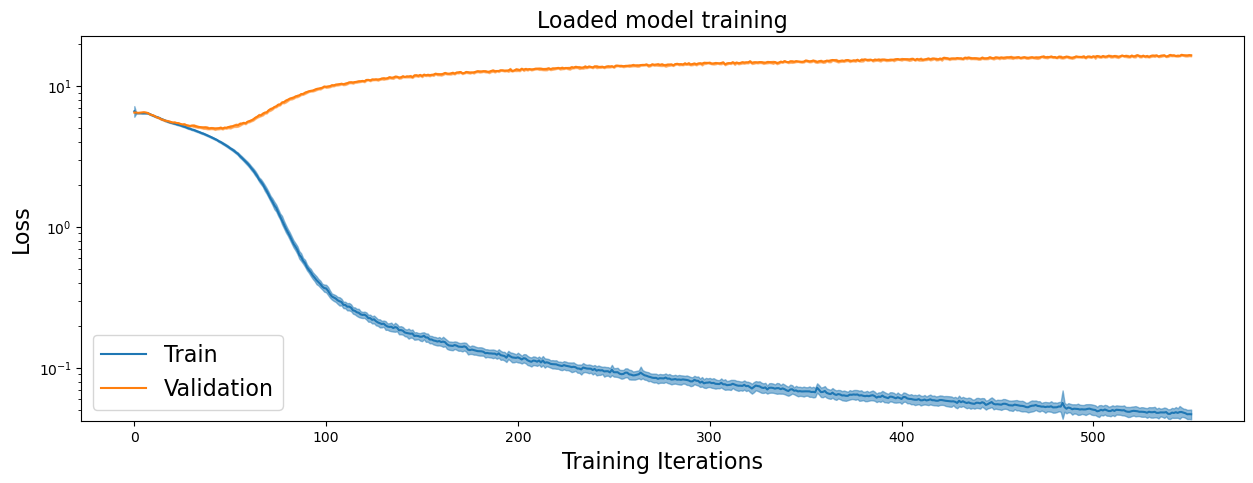

In [3]:
savedir = '/home/tau/emenier/data/GPT/DecoderGPT/SplitGPUTolkien/'
lr = 3e-4
dtype = torch.float32
max_block_size = 1024 # what is the maximum context length for predictions?
n_heads = 12
C = n_heads*64
n_layer = 12
dropout = 0.1

gpt_model = miniGPT.gpt.DecoderGPT(vocab_size, C, n_layer, n_heads, 
                    max_block_size, dropout_freq=dropout).to(device,dtype)

trainer = miniGPT.train_utils.DecoderGPTtrainer(gpt_model,lr,
                    checkpoint_path=savedir,wd=1e-5)
dic = trainer.load('last_model.trch')
trainer.gpt_model.eval()
train_dataset = miniGPT.train_utils.TextDataset(
                data[:int(0.9*len(data))],max_block_size)
val_dataset = miniGPT.train_utils.TextDataset(
                data[int(0.9*len(data)):],max_block_size)

miniGPT.plot_utils.model_numbers(gpt_model,max_block_size,n_layer,C, n_heads)
miniGPT.plot_utils.plot_losses(dic)

In [5]:
ix = np.random.choice(len(val_dataset))
gen_length = 75
x,y = val_dataset.data[ix:ix+max_block_size],val_dataset.data[ix:ix+max_block_size+gen_length]
x, y = x.reshape(1,*x.shape), y.reshape(1,*y.shape)
with torch.no_grad():
    ret = trainer.gpt_model.generate(x,gen_length)
decoded_gen = tokenizer.decode(ret[0,max_block_size:].detach().cpu().numpy())
decoded_truth = tokenizer.decode(y[0,max_block_size-10:max_block_size].detach().cpu().numpy())
decoded_truth_2 = tokenizer.decode(y[0,max_block_size-10:].detach().cpu().numpy())
print(decoded_truth + ' ----- ' + decoded_gen)
print()
print('-------------')
print(decoded_truth_2)
print()

100%|██████████| 75/75 [00:01<00:00, 38.21it/s]

 King Éomer of Rohan, and the Prince Imrahil and -----  Lady; and the Lady in the City was soft and Gimli, who had played the Ring. But they were no sign of the Lady of the Elves. The darkness of Middle-dûr had been heard, and a deep stroke was on him. He was sitting in a grey chamber; and the miles of the shadows he had never heard in his back. For a moment he

-------------
 King Éomer of Rohan, and the Prince Imrahil and all the chief captains; and there also were Gimli and Legolas. But when, after the Standing Silence, wine was brought there came in two esquires to serve the kings; or so they seemed to be: one was clad in the silver and sable of the Guards of Minas Tirith, and the other in white and green. But Sam wondered what such young boys were doing in an



In [10]:
torch.cuda.device_count()

1

In [23]:
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

In [24]:
tokenizer.encode(text[:100])

[220,
 220,
 1649,
 1770,
 13,
 24207,
 2127,
 49329,
 1040,
 286,
 20127,
 5268,
 3414,
 326,
 339,
 561,
 8972,
 307,
 17499,
 465,
 9766,
 1151,
 88,
 12,
 69,
 343]